In [1]:
import SimpleITK as sitk

from platipy.imaging import ImageVisualiser

In [5]:
img_ct_from_pet = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_0_CT_NON_CONTRAST_CHEST_5.nii.gz")
img_ct_planning = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_1_CT_NON_CONTRAST_CHEST_10.nii.gz")

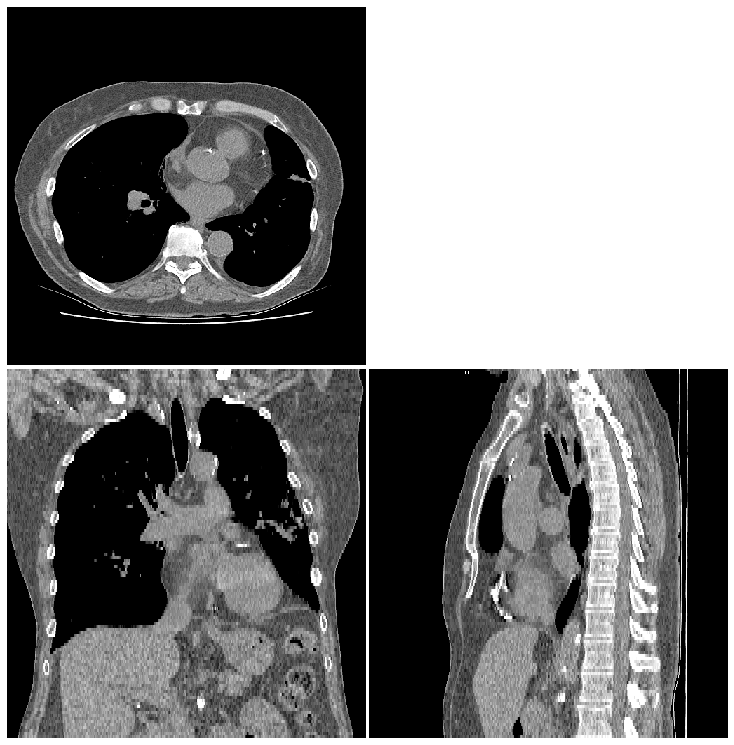

In [6]:
vis = ImageVisualiser(img_ct_planning)
fig = vis.show()

In [7]:
from platipy.imaging.registration.linear import linear_registration

In [27]:
img_ct_pet_to_planning, tfm = linear_registration(
    img_ct_planning,
    img_ct_from_pet,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid',
    sampling_rate=1,
    verbose = True
)
tfm

  0 = 256149.11396
  1 = 228362.84744
  2 = 202812.65500
  3 = 189467.53355
  4 = 180542.16979
  5 = 176089.11167
  6 = 175564.49615
  7 = 174234.99960
  8 = 172839.26370
  9 = 172038.94184
 10 = 171327.39478
 11 = 170675.76417
 12 = 170130.48392
 13 = 169802.44804
 14 = 169374.43165
 15 = 168339.15975
 16 = 168014.21572
 17 = 167729.23759
 18 = 167486.32300
 19 = 167487.04200
 20 = 167488.29017
 21 = 167490.14046
 22 = 167458.15405
 23 = 167645.05419
 24 = 167530.97018
 25 = 167545.98596


<SimpleITK.SimpleITK.CompositeTransform; proxy of <Swig Object of type 'itk::simple::CompositeTransform *' at 0x0000020285134C30> >

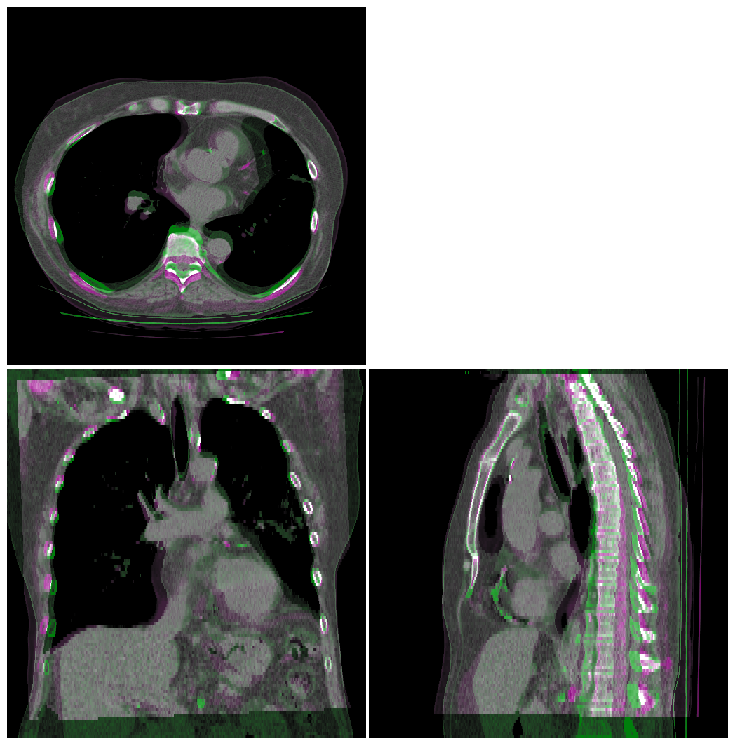

In [9]:
vis = ImageVisualiser(img_ct_planning)
vis.add_comparison_overlay(img_ct_pet_to_planning)
fig = vis.show()

In [34]:
img_pt = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_2_CT_THORAX_GATED_2.nii.gz")

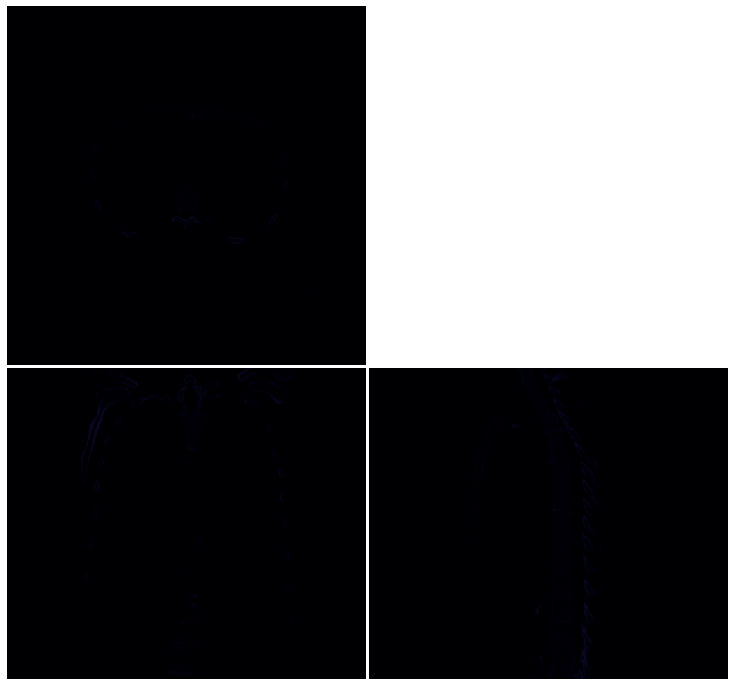

In [35]:
vis = ImageVisualiser(img_pt, window=(0,20000), colormap=plt.cm.magma)
fig = vis.show()

In [36]:
img_pt_res = sitk.Resample(img_pt, img_ct_from_pet, sitk.Transform(), sitk.sitkLinear)

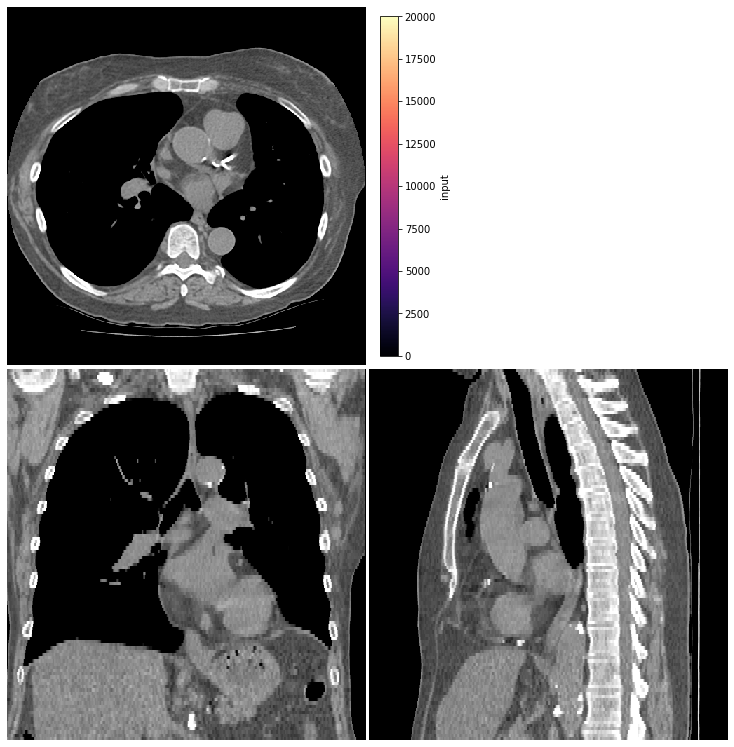

In [37]:
vis = ImageVisualiser(img_ct_from_pet)
vis.add_scalar_overlay(img_pt_res, max_value=20000, colormap=plt.cm.magma)
fig = vis.show()

In [38]:
from platipy.imaging.registration.utils import apply_transform
import matplotlib.pyplot as plt


In [39]:
img_pt_to_planning = apply_transform(img_ct_pet_to_planning, img_ct_planning, tfm)

In [40]:
ctr = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_2_CT_THORAX_GATED_2.nii.gz")

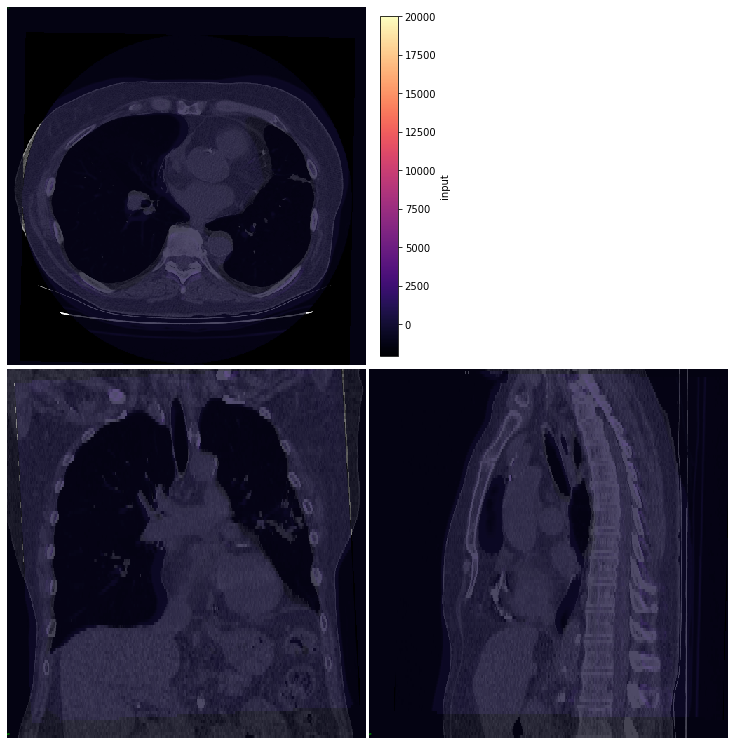

In [41]:
vis = ImageVisualiser(img_ct_planning)
vis.add_contour(ctr, color="green", linewidth=3)
vis.add_scalar_overlay(img_ct_pet_to_planning, max_value=20000, colormap=plt.cm.magma)
fig = vis.show()

In [43]:
ct_image_deformed = apply_transform(
    input_image=img_ct_planning,
    reference_image=None,
    transform=tfm,
    default_value=-1000,
    interpolator=sitk.sitkBSpline,
)

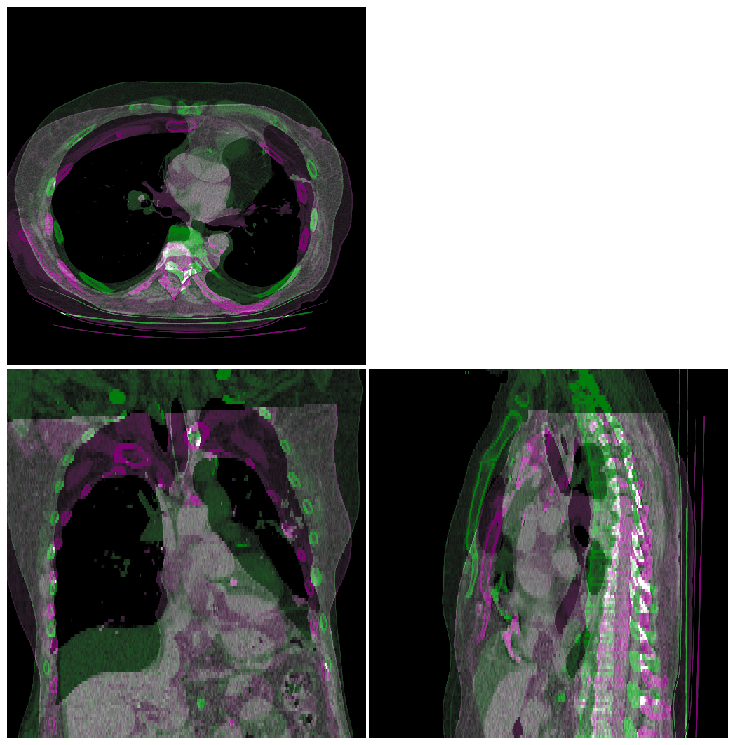

In [45]:
vis = ImageVisualiser(img_ct_planning)
vis.add_comparison_overlay(ct_image_deformed)
fig = vis.show()